In [14]:
#Data Analysis
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
# Import dataset
covid = pd.read_csv("data/Quebec Covid-19.csv")

# Filter dataset to Quebec only
covid = covid.loc[covid['prname'] == 'Quebec']

# Remove unwanted columns
covid.drop(['pruid', 'prnameFR', 'numprob', 'update', 'numtested', 'numtests', 'numrecover', 'percentrecover','ratetested', 'ratetests', 'percentoday', 'ratetotal', 'ratedeaths',
            'percentdeath', 'numtestedtoday', 'numteststoday', 'numrecoveredtoday','percentactive', 'rateactive', 'numtotal_last14', 'ratetotal_last14', 'ratedeaths_last14',
            'numdeaths_last14', 'ratetotal_last7', 'ratedeaths_last7', 'avgtotal_last7','avgincidence_last7', 'avgdeaths_last7', 'avgratedeaths_last7', 'raterecovered'], axis = 1, inplace = True)

# Convert date
covid['date'] = pd.to_datetime(covid['date'])

covid['date_year'] = covid['date'].dt.year
covid['date_month'] = covid['date'].dt.month
#covid['date'] = covid['date'].dt.date

# Deal with N/A values
# Only num_total_last7 and numdeaths_last7 have minimal empty values due to the nature of the variable. Fill empty values with 0
covid['numtotal_last7'].fillna(0, inplace = True)
covid['numdeaths_last7'].fillna(0, inplace = True)

# X = date
# Y = numconf, numtoday, numdeathstoday, numrecoveredtoday, numtotal_last7, numdeaths_last7

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 29 to 9797
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   prname           657 non-null    object        
 1   date             657 non-null    datetime64[ns]
 2   numconf          657 non-null    int64         
 3   numdeaths        657 non-null    float64       
 4   numtotal         657 non-null    int64         
 5   numtoday         657 non-null    int64         
 6   numdeathstoday   657 non-null    float64       
 7   numactive        657 non-null    float64       
 8   numtotal_last7   657 non-null    float64       
 9   numdeaths_last7  657 non-null    float64       
 10  date_year        657 non-null    int64         
 11  date_month       657 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 66.7+ KB


In [16]:
covid.reset_index(inplace = True)


In [17]:
covid['dayfromstart'] = covid.index

In [18]:
covidlockdown1 = covid[6:27]

In [19]:
covidlockdown1["dayfromstart"] -= 16

C:\Users\alexa\AppData\Local\Temp/ipykernel_10860/142618173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidlockdown1["dayfromstart"] -= 16


In [20]:
X = covidlockdown1['dayfromstart']

In [21]:
covidlockdown1

,index,prname,date,numconf,numdeaths,numtotal,numtoday,numdeathstoday,numactive,numtotal_last7,numdeaths_last7,date_year,date_month,dayfromstart
6,54,Quebec,2020-03-09,4,0.0,4,1,0.0,4.0,0.0,0.0,2020,3,-10
7,62,Quebec,2020-03-11,7,0.0,7,3,0.0,7.0,0.0,0.0,2020,3,-9
8,77,Quebec,2020-03-12,13,0.0,13,6,0.0,13.0,0.0,0.0,2020,3,-8
9,92,Quebec,2020-03-13,17,0.0,17,4,0.0,17.0,0.0,0.0,2020,3,-7
10,107,Quebec,2020-03-14,17,0.0,17,0,0.0,17.0,0.0,0.0,2020,3,-6
11,122,Quebec,2020-03-15,24,0.0,24,7,0.0,24.0,0.0,0.0,2020,3,-5
12,137,Quebec,2020-03-16,39,0.0,39,15,0.0,39.0,0.0,0.0,2020,3,-4
13,152,Quebec,2020-03-17,50,0.0,50,11,0.0,50.0,0.0,0.0,2020,3,-3
14,167,Quebec,2020-03-18,74,1.0,74,24,1.0,73.0,0.0,0.0,2020,3,-2
15,182,Quebec,2020-03-19,121,1.0,121,47,0.0,120.0,0.0,0.0,2020,3,-1


In [22]:
X = sm.add_constant(X)
y = covidlockdown1['numtoday']

In [23]:
est = sm.OLS(y, X).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     61.04
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.38e-07
Time:                        21:01:21   Log-Likelihood:                -126.30
No. Observations:                  21   AIC:                             256.6
Df Residuals:                      19   BIC:                             258.7
Df Model:                           1                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          163.1905     22.663      7.201      0.000     118.772     207.609
dayfromstart    27.8117      3.560      7.813      0.000      20.835      34.789
==============================================================================
Omnibus:                        0.485   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.597
Skew:                          -0.232   Prob(JB):                        0.742
Kurtosis:                       2.316   Cond. No.                         6.06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

<AxesSubplot:xlabel='dayfromstart', ylabel='numtoday'>

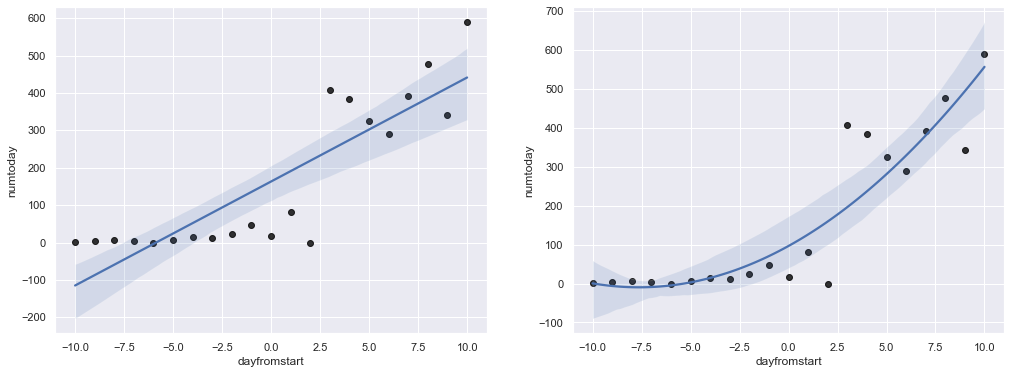

In [24]:
x = covidlockdown1['dayfromstart']
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17, 6))
sns.regplot(x = x, y = y, order = 1, ax= ax1, scatter_kws={"color": "black"})
sns.regplot(x = x, y = y, order = 2, ax= ax2, scatter_kws={"color": "black"})

In [58]:
covidlockdown1['Group'] = np.where(covidlockdown1['dayfromstart'] > 0, "Treatment", "Control")
rd = "numtoday ~ 1 + C(Group) + dayfromstart"
basic = smf.ols(rd, covidlockdown1).fit(cov_type = 'HC2')
basic.summary()

C:\Users\alexa\AppData\Local\Temp/ipykernel_10860/3722646054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidlockdown1['Group'] = np.where(covidlockdown1['dayfromstart'] > 0, "Treatment", "Control")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     31.74
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.25e-06
Time:                        22:04:09   Log-Likelihood:                -125.63
No. Observations:                  21   AIC:                             257.3
Df Residuals:                      18   BIC:                             260.4
Df Model:                           2                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               116.1169     50.773      2.287      0.022      16.603     215.631
C(Group)[T.Treatment]    98.8545    122.711      0.806      0.420    -141.654     339.364
dayfromstart             20.7506      9.507      2.183      0.029       2.118      39.383
==============================================================================
Omnibus:                        3.521   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                1.812
Skew:                          -0.661   Prob(JB):                        0.404
Kurtosis:                       3.568   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

<AxesSubplot:xlabel='dayfromstart', ylabel='numtoday'>

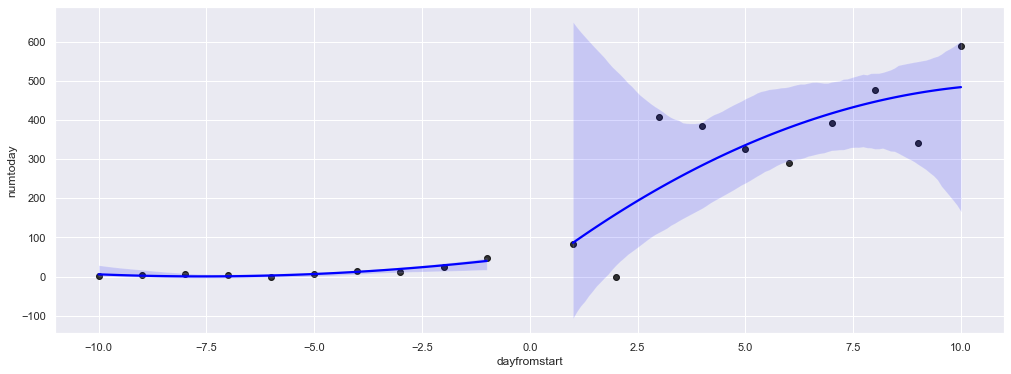

In [60]:
beforelock1 = covidlockdown1[covidlockdown1['dayfromstart'] < 0]
afterlock1 = covidlockdown1[covidlockdown1['dayfromstart'] > 0]
y1 = beforelock1['numtoday']
y2 = afterlock1['numtoday']
x1 = beforelock1['dayfromstart']
x2 = afterlock1['dayfromstart']
fig,ax = plt.subplots(figsize=(17, 6))
sns.regplot(x = x1, y = y1, order = 2, ax= ax, scatter_kws={"color": "black"}, line_kws = {"color": "blue"})
sns.regplot(x = x2, y = y2, order = 2, ax= ax, scatter_kws={"color": "black"}, line_kws = {"color": "blue"})

In [ ]:
# We are interested in desinging RDD using (numtoday | numtotal_last7 | numdeaths_last7)

# Lets use the date variable and set a threshold to see what we can expect from final model
covid['date_month'] -= 8
,
plt.figure(figsize = (8,8))
ax = plt.subplot(3, 1, 1)
covid.plot.scatter(x = 'date_month', y = 'numtoday', ax = ax)

ax = plt.subplot(3, 1, 2, sharex = ax)
covid.plot.scatter(x = 'date_month', y = 'numtotal_last7', ax = ax)

ax = plt.subplot(3, 1, 3, sharex = ax)
covid.plot.scatter(x = 'date_month', y = 'numdeaths_last7', ax = ax)

# Following the opening of schools in August, the total cases and 7 day rolling average seems to increase
# This doesnt show a good picture as the input date variable is not ideal.

In [ ]:
covid.reset_index(inplace = True)

In [ ]:
# One possible solution is to create a new column called days_from_start which represents a numerical value
# that incremenets by 1 for each day that have passed after 2020-03-01 (keeping in mind an increment represents available data)
# Correction: Start from 2020-03-05 as data is missing 02 and 04
covid = covid.drop(index = 0)
covid = covid.drop(index = 1)
covid.reset_index(inplace = True)

In [ ]:
covid['days_from_start'] = covid.index

In [ ]:
covid = covid.drop(columns = ['level_0', 'index'])

In [ ]:
# Now we can use the new column as the threshold for the RDD model.
# Plug into a simple linear regression model
